In [55]:
import preprocessing as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import pos_tag, word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def load_data(full = True):
    """
    Loads the Twitter data.
    
    Args:
    full (bool): if False, loads only a part of the data
    
    Returns:
    tweets (pandas dataframe): positive and negative tweets with labels
    test_data: unlabelled data for testing
    """
    FULL = ''  
    if full:
        FULL = '_full'
        
    POS_TWEETS = 'train_pos.txt'
    NEG_TWEETS = 'train_neg.txt'
    TEST_DATA = 'test_data.txt'
    
    with open(POS_TWEETS) as file:
        pos_tweets_data = [line.rstrip() for line in file]
    pos_tweets = pd.DataFrame(pos_tweets_data, columns=['body'])
    pos_tweets['label'] = 1

    with open(NEG_TWEETS) as file:
        neg_tweets_data = [line.rstrip() for line in file]
    neg_tweets = pd.DataFrame(neg_tweets_data, columns=['body'])
    neg_tweets['label'] = -1

    with open(TEST_DATA) as file:
        # removes id at the same time
        test_data = [line.rstrip().split(',', 1)[1] for line in file]

    test_data = pd.DataFrame(test_data, columns=['body'])

    # merge positive and negative datasets
    tweets = pd.concat([pos_tweets, neg_tweets], axis = 0)
    
    return tweets, test_data

tweets_raw, test_data_raw = load_data(full = False)

tweets_raw

,body,label
0,<user> i dunno justin read my mention or not ....,1
1,"because your logic is so dumb , i won't even c...",1
2,""" <user> just put casper in a box ! "" looved t...",1
3,<user> <user> thanks sir > > don't trip lil ma...,1
4,visiting my brother tmr is the bestest birthda...,1
...,...,...
99995,can't wait to fake tan tonight ! hate being pale,-1
99996,<user> darling i lost my internet connection ....,-1
99997,kanguru defender basic 4 gb usb 2.0 flash driv...,-1
99998,rizan is sad now,-1


In [56]:
tweets = tweets_raw.copy()
# we'll check the lenght of each tweet and counts of words used before and after preprocessing
# as we know, max of words is 280
tweets_raw['words_count'] = tweets_raw['body'].apply(lambda x: len(str(x).split()))
tweets_raw['tweet_len'] = tweets_raw['body'].astype(str).apply(len)

tweets_raw

,body,label,words_count,tweet_len
0,<user> i dunno justin read my mention or not ....,1,27,127
1,"because your logic is so dumb , i won't even c...",1,21,91
2,""" <user> just put casper in a box ! "" looved t...",1,15,69
3,<user> <user> thanks sir > > don't trip lil ma...,1,17,78
4,visiting my brother tmr is the bestest birthda...,1,13,66
...,...,...,...,...
99995,can't wait to fake tan tonight ! hate being pale,-1,10,48
99996,<user> darling i lost my internet connection ....,-1,33,138
99997,kanguru defender basic 4 gb usb 2.0 flash driv...,-1,23,123
99998,rizan is sad now,-1,4,16


In [57]:
# before preprocessing
print(tweets_raw['tweet_len'].mean())
print(tweets_raw['words_count'].mean())

75.89486
15.73753


In [58]:
tweets['body'] = pp.preprocess_data(tweets['body'])
print(tweets)

                                                    body  label
0      not know justin read mention not only justin g...      1
1                logic dumb not even crop name photo tsk      1
2      put casper box ! looved battle ! <hashtag> cra...      1
3      thanks sir not trip lil mama .. keep doin ya t...      1
4      visit brother tmr bestest birthday gift eveerr...      1
...                                                  ...    ...
99995           cannot wait fake tan tonight ! hate pale     -1
99996  darling lose internet connection .. seem not c...     -1
99997  kanguru defender basic <number> gb usb <number...     -1
99998                                          rizan sad     -1
99999                             no text back ? yea mad     -1

[200000 rows x 2 columns]


In [59]:
# after preprocessing
tweets['words_count'] = tweets['body'].apply(lambda x: len(str(x).split()))
tweets['tweet_len'] = tweets['body'].astype(str).apply(len)
tweets

,body,label,words_count,tweet_len
0,not know justin read mention not only justin g...,1,15,92
1,logic dumb not even crop name photo tsk,1,8,39
2,put casper box ! looved battle ! <hashtag> cra...,1,9,53
3,thanks sir not trip lil mama .. keep doin ya t...,1,12,52
4,visit brother tmr bestest birthday gift eveerr...,1,10,62
...,...,...,...,...
99995,cannot wait fake tan tonight ! hate pale,-1,8,40
99996,darling lose internet connection .. seem not c...,-1,17,99
99997,kanguru defender basic <number> gb usb <number...,-1,16,111
99998,rizan sad,-1,2,9


In [60]:
# how many words were used in average? as we know, max is 280
print(tweets['tweet_len'].mean())
print(tweets['words_count'].mean())

50.73144
8.509525


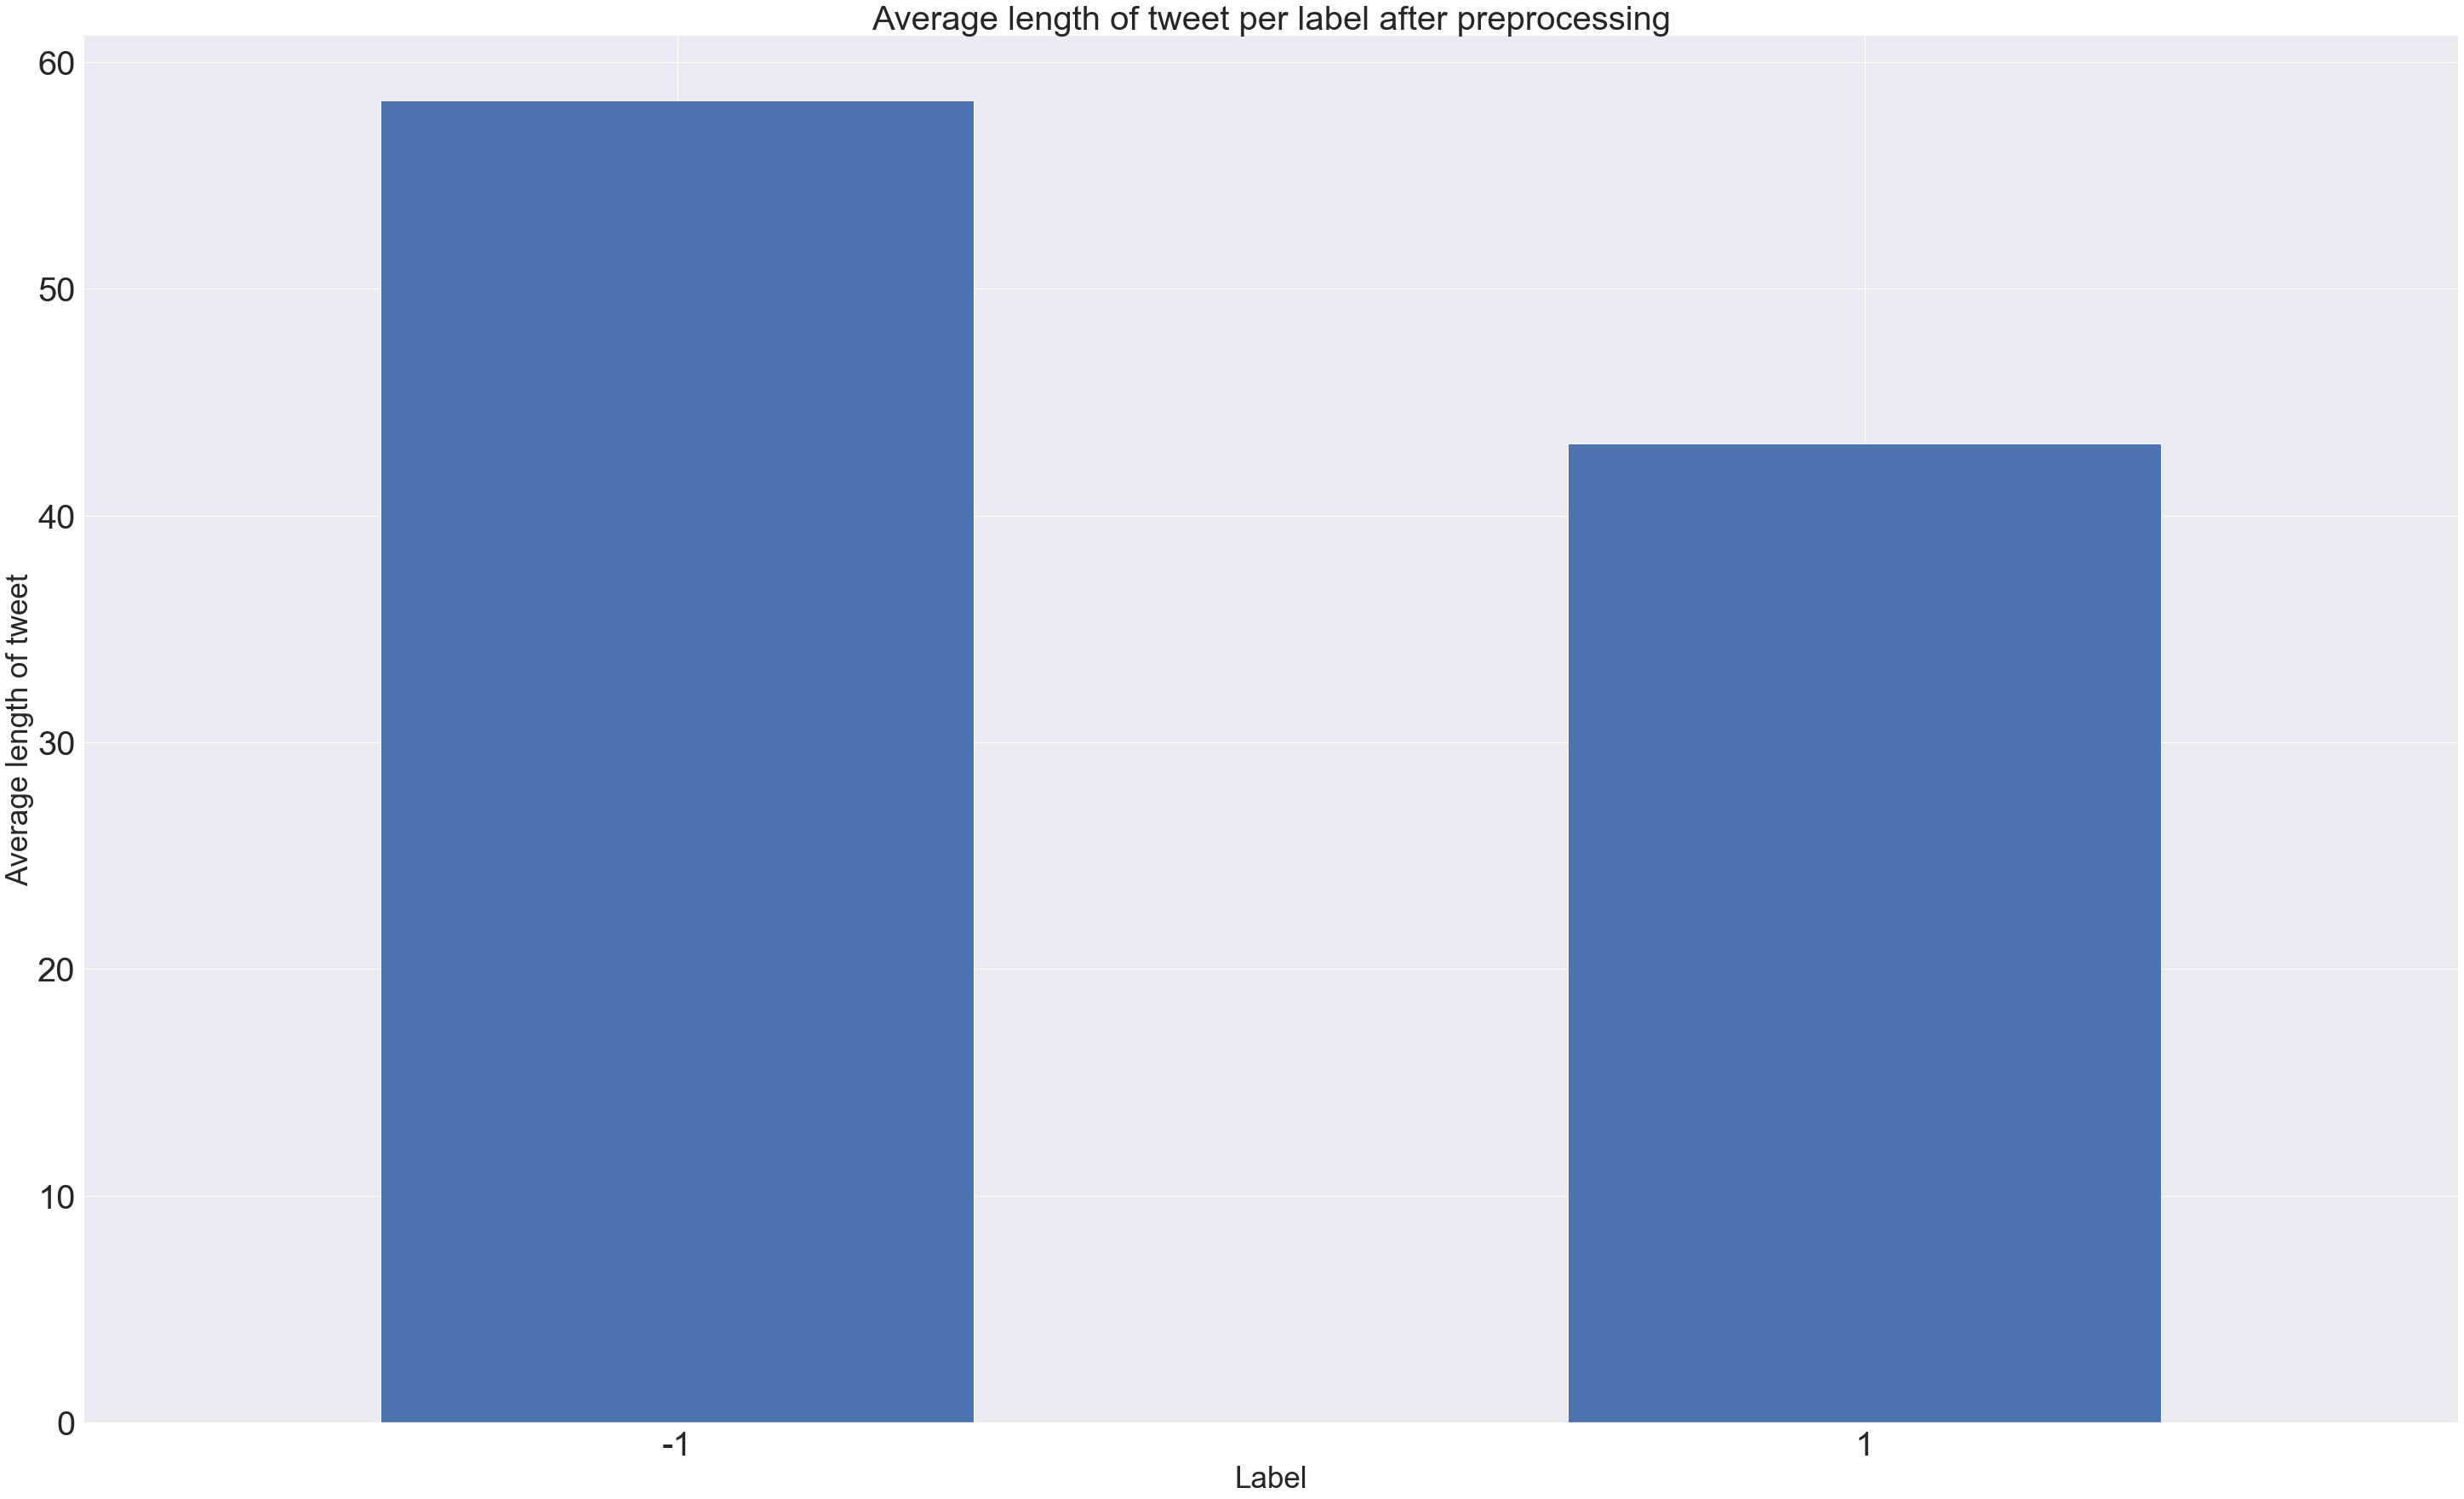

In [61]:
length_avg = tweets.groupby('label')['tweet_len'].mean().plot(kind='bar', figsize=(50,30))

plt.xlabel('Label', fontsize=35)
plt.ylabel('Average length of tweet', fontsize=35)
plt.xticks(fontsize=40, rotation= 360)
plt.yticks(fontsize=40)
plt.title('Average length of tweet per label after preprocessing', fontsize=40)
plt.show()

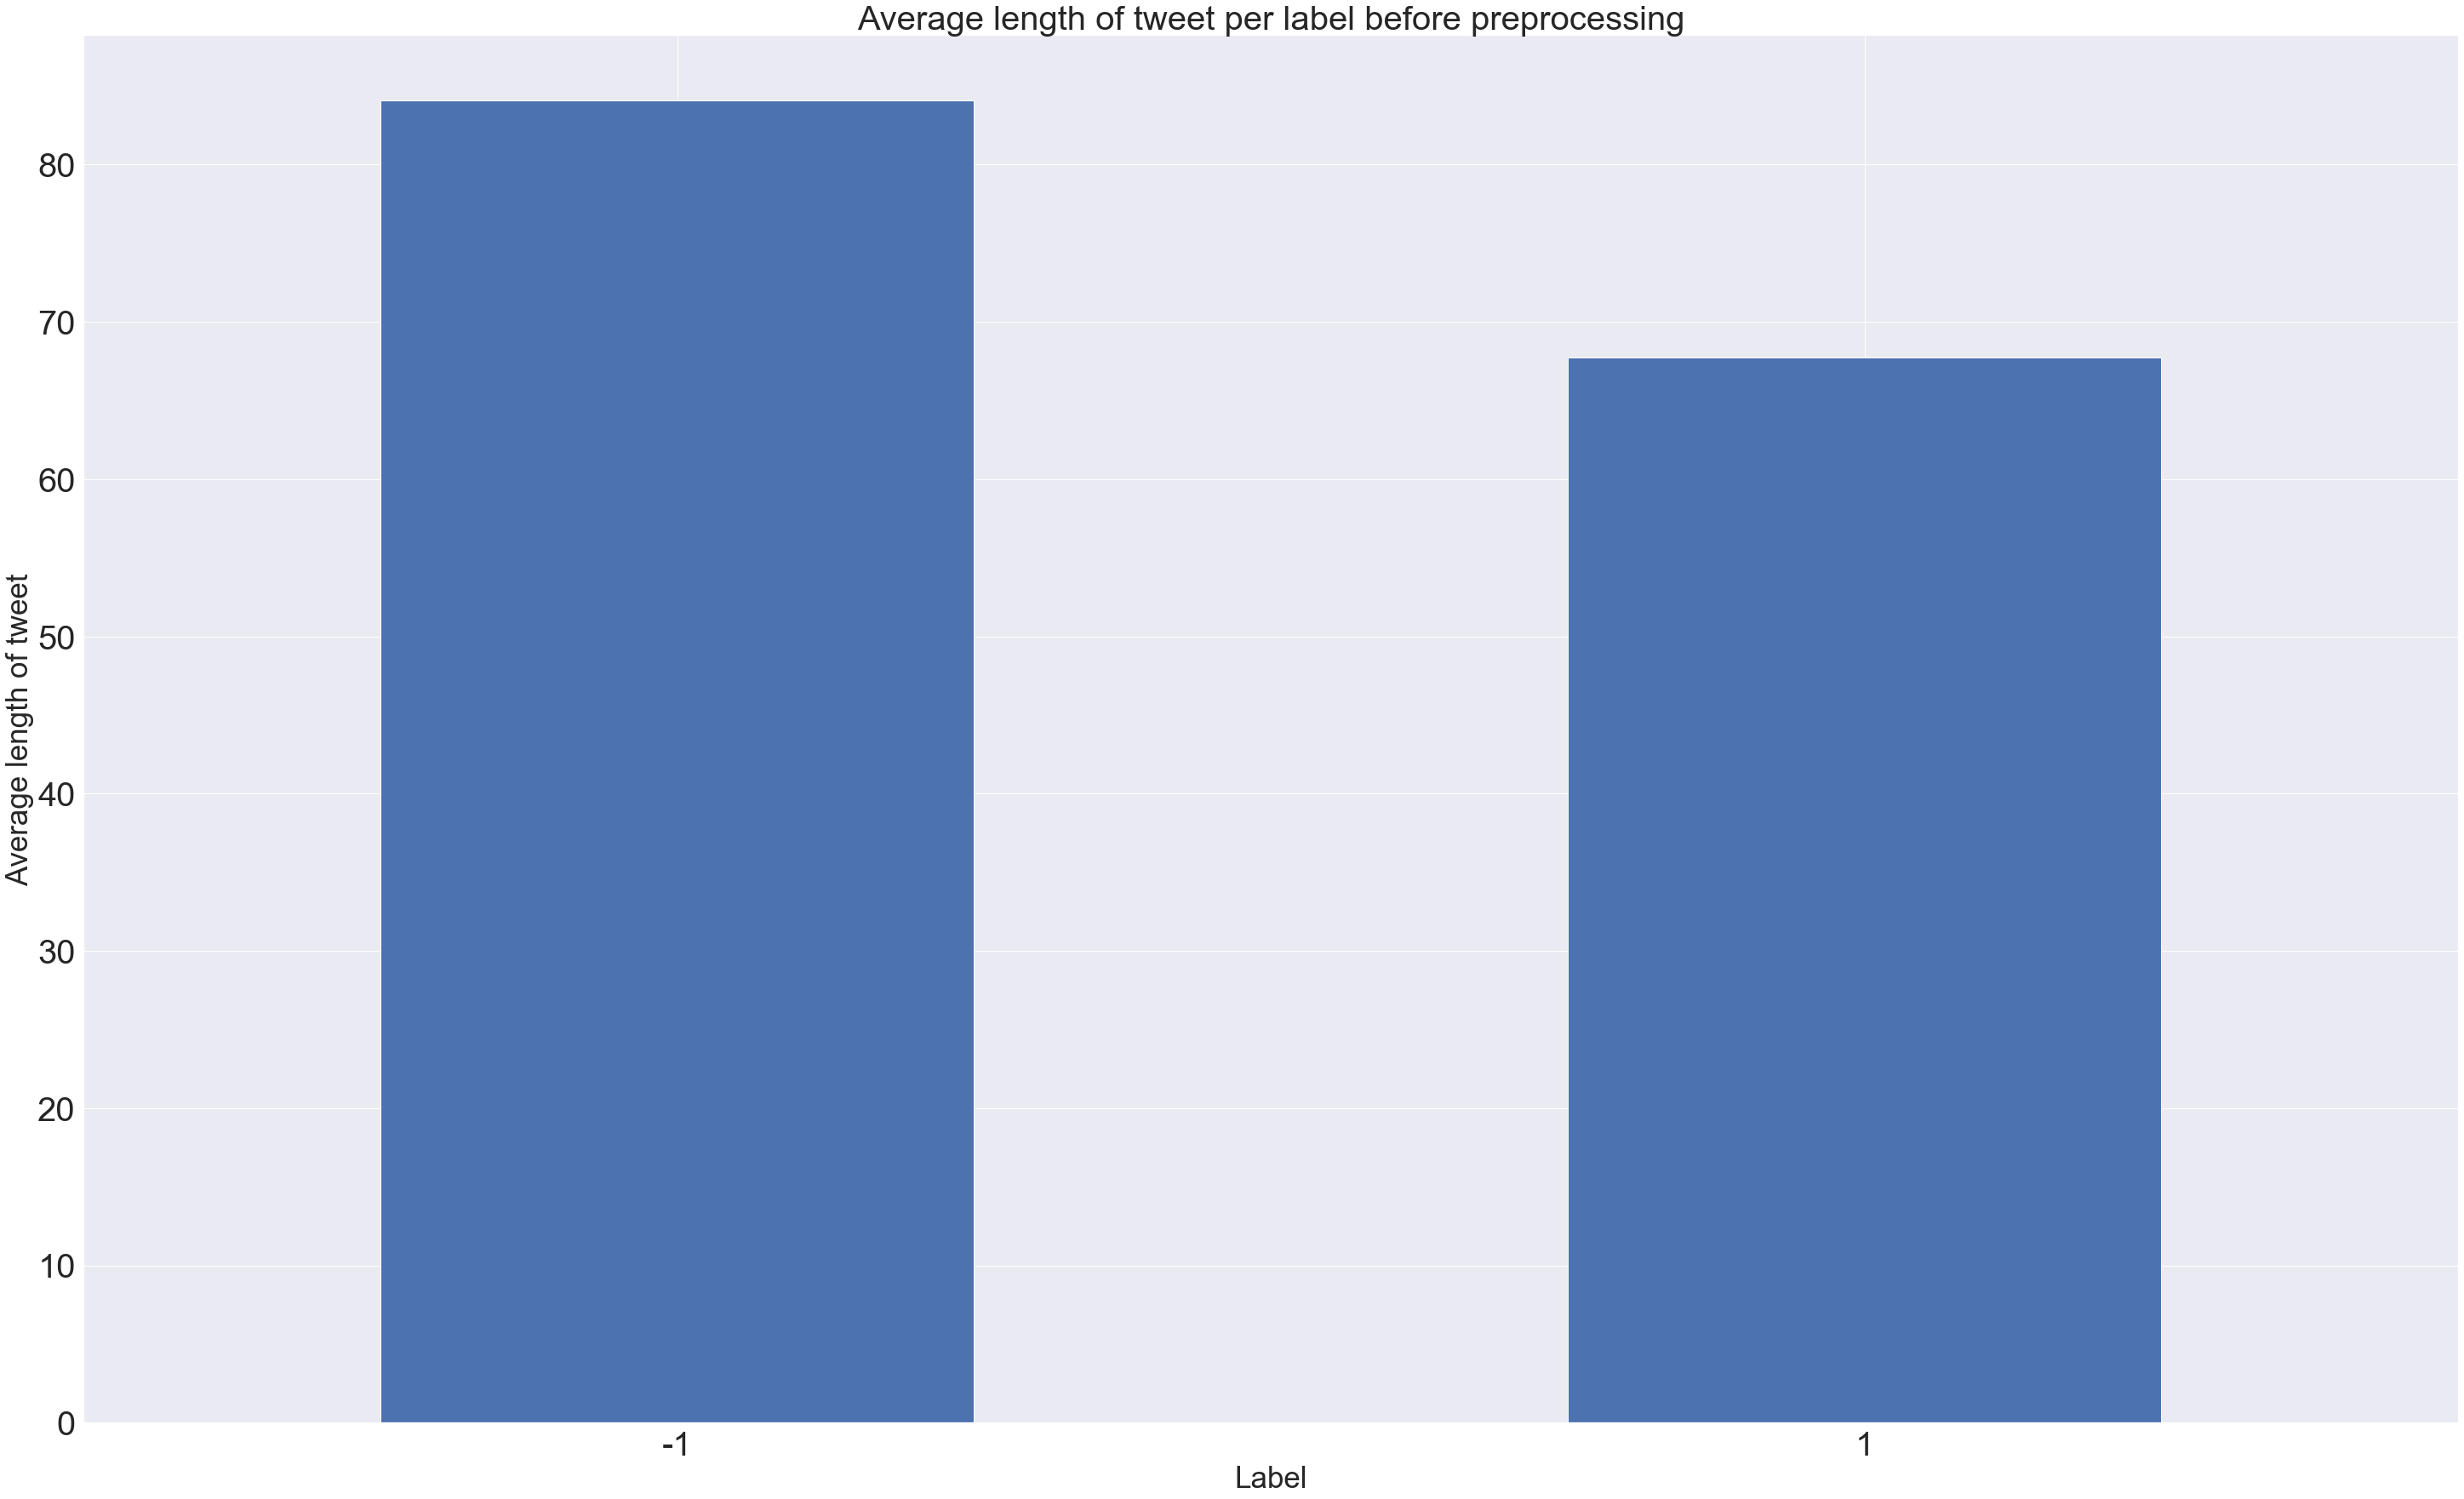

In [62]:
length2_avg = tweets_raw.groupby('label')['tweet_len'].mean().plot(kind='bar', figsize=(50,30))

plt.xlabel('Label', fontsize=35)
plt.ylabel('Average length of tweet', fontsize=35)
plt.xticks(fontsize=40, rotation= 360)
plt.yticks(fontsize=40)
plt.title('Average length of tweet per label before preprocessing', fontsize=40)
plt.show()

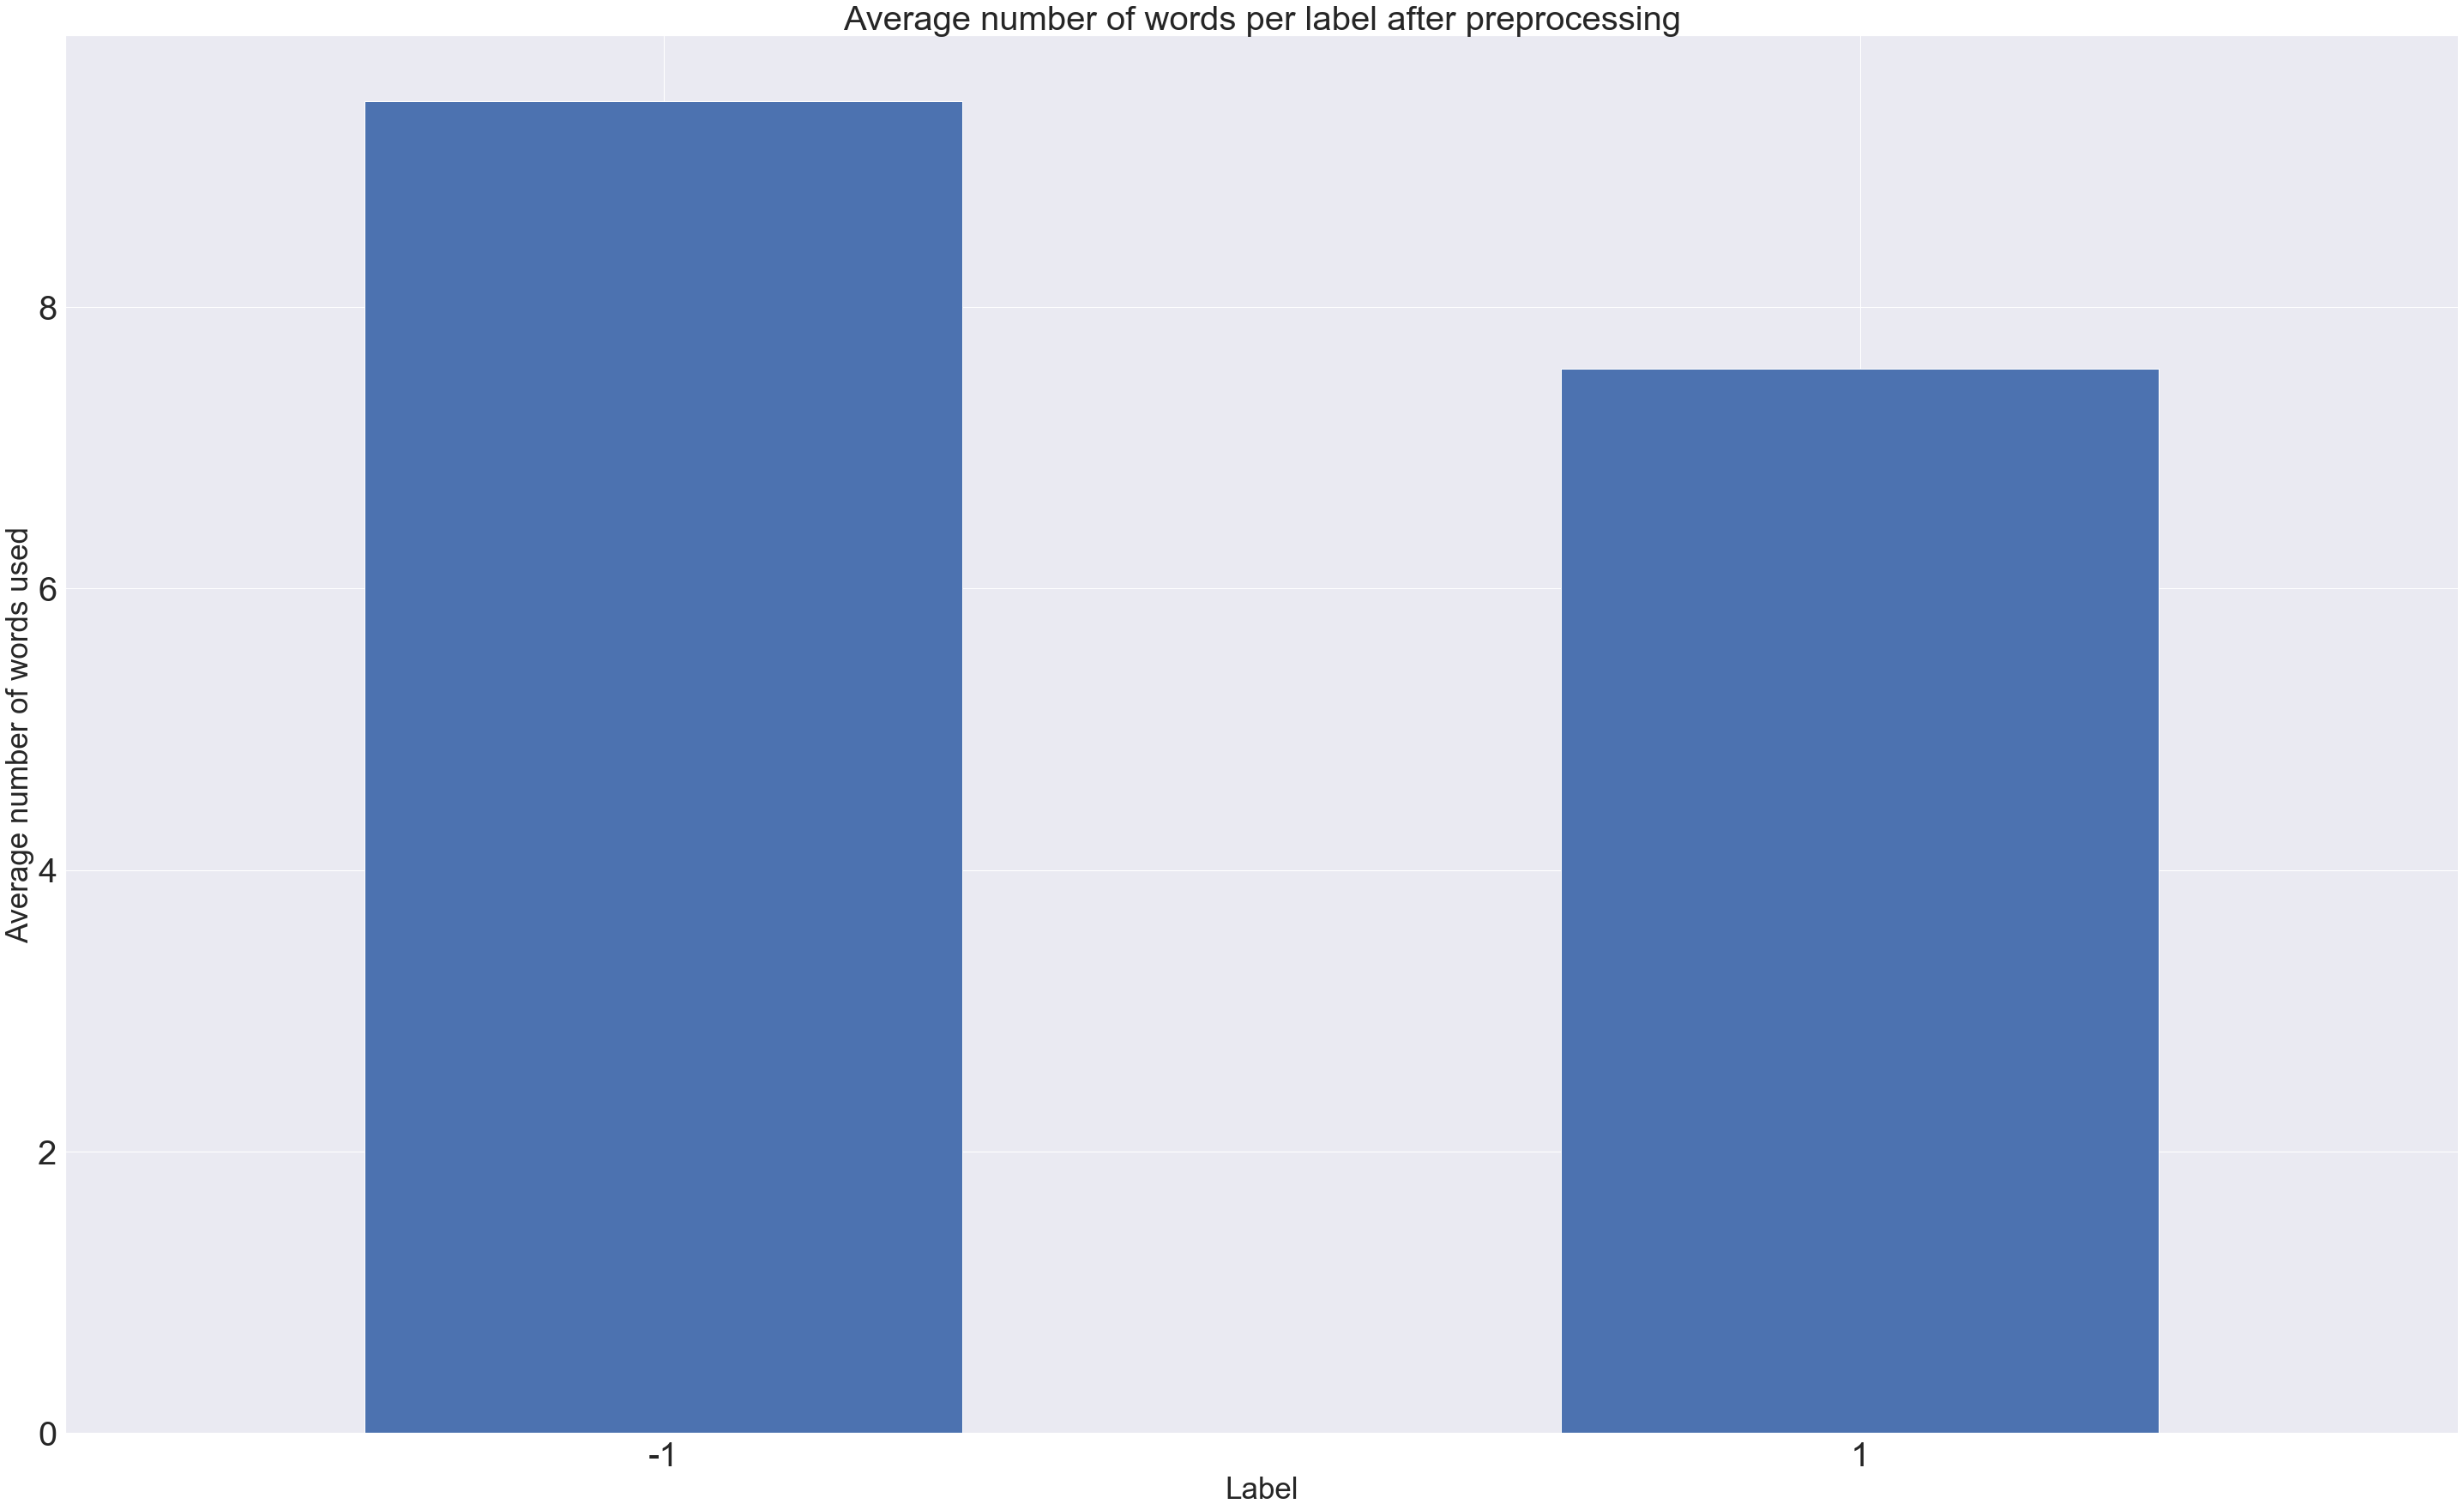

In [63]:
tweet_avg = tweets.groupby('label')['words_count'].mean().plot(kind='bar', figsize=(50,30))

plt.xlabel('Label', fontsize=35)
plt.ylabel('Average number of words used', fontsize=35)
plt.xticks(fontsize=40, rotation= 360)
plt.yticks(fontsize=40)
plt.title('Average number of words per label after preprocessing', fontsize=40)
plt.show()

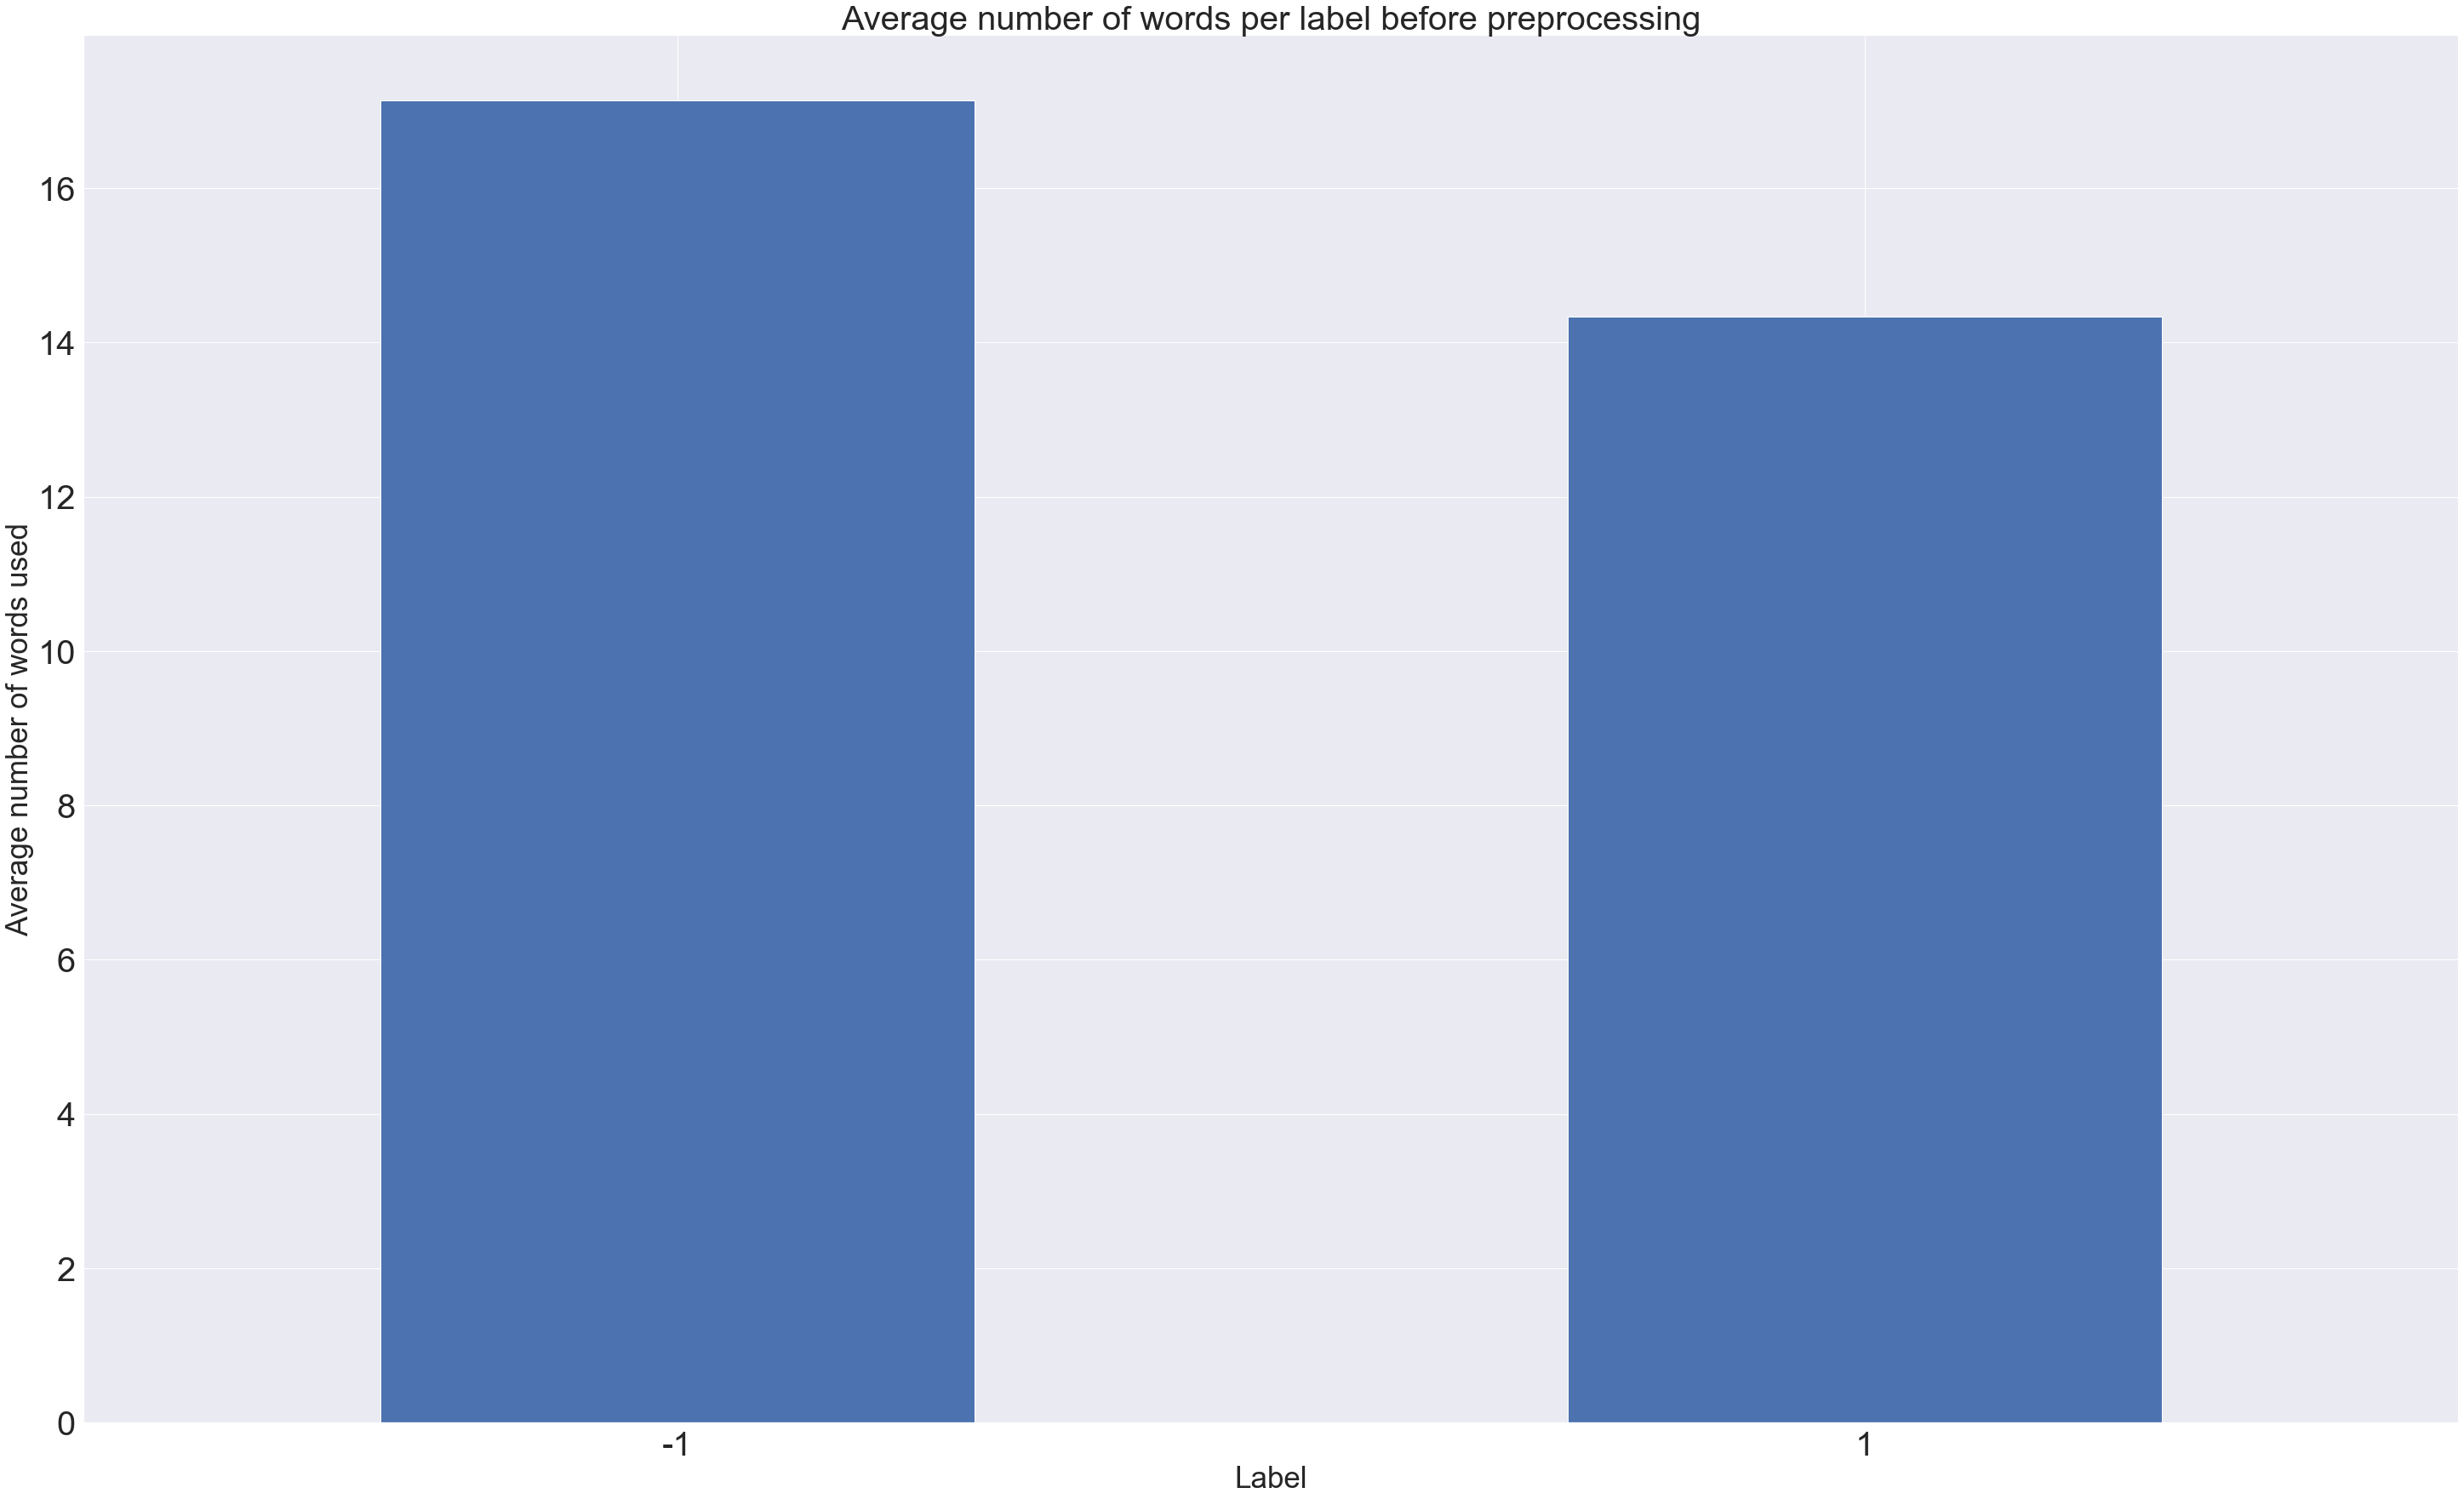

In [64]:
tweet2_avg = tweets_raw.groupby('label')['words_count'].mean().plot(kind='bar', figsize=(50,30))

plt.xlabel('Label', fontsize=35)
plt.ylabel('Average number of words used', fontsize=35)
plt.xticks(fontsize=40, rotation= 360)
plt.yticks(fontsize=40)
plt.title('Average number of words per label before preprocessing', fontsize=40)
plt.show()

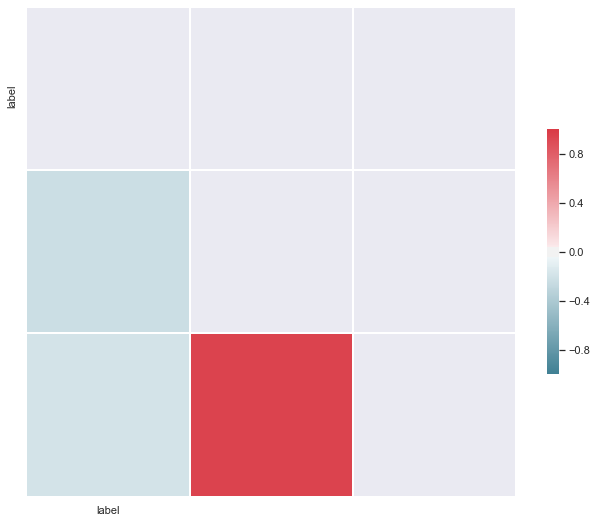

,label,tweet_len,words_count
label,1.000000,-0.232163,-0.190986
tweet_len,-0.232163,1.000000,0.951598
words_count,-0.190986,0.951598,1.000000


In [65]:
sns.set(style="darkgrid")

corr = tweets_raw[['label','tweet_len', 'words_count']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=3, yticklabels=3,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

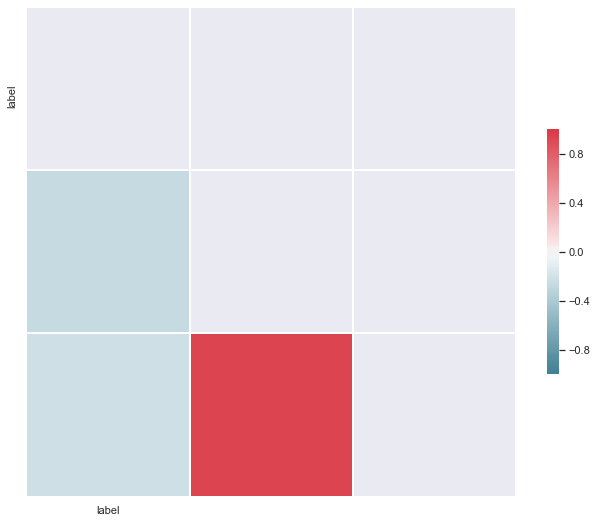

,label,tweet_len,words_count
label,1.000000,-0.258337,-0.217084
tweet_len,-0.258337,1.000000,0.942262
words_count,-0.217084,0.942262,1.000000


In [66]:
sns.set(style="darkgrid")

corr = tweets[['label','tweet_len', 'words_count']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=3, yticklabels=3,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

In [67]:
tweets_raw['tweet_str'] = [''.join(map(str,l)) for l in tweets_raw['body']]
tweets_raw.head()

,body,label,words_count,tweet_len,tweet_str
0,<user> i dunno justin read my mention or not ....,1,27,127,<user> i dunno justin read my mention or not ....
1,"because your logic is so dumb , i won't even c...",1,21,91,"because your logic is so dumb , i won't even c..."
2,""" <user> just put casper in a box ! "" looved t...",1,15,69,""" <user> just put casper in a box ! "" looved t..."
3,<user> <user> thanks sir > > don't trip lil ma...,1,17,78,<user> <user> thanks sir > > don't trip lil ma...
4,visiting my brother tmr is the bestest birthda...,1,13,66,visiting my brother tmr is the bestest birthda...


In [68]:
example = tweets_raw['tweet_str']
tokenized_sents = [word_tokenize(i) for i in example]
allwords = []
for wordlist in tokenized_sents:
    allwords += wordlist

[('<', 178271), ('>', 175203), ('user', 128018), ('i', 100234), ('!', 83074), ('the', 60486), ('.', 59814), (',', 59692), ('to', 55932), ('you', 51958), ('(', 47156), ('url', 43642), ('a', 41632), ('...', 40969), ('and', 36132), ('my', 31865), ('#', 29332), ('it', 28037), ('me', 27704), ('of', 26953), ('?', 26418), ('is', 25493), ('for', 24344), ('in', 23995), ("'s", 21181), ('``', 20457), ("n't", 19486), ('that', 18706), (':', 18672), ('this', 18190), ('so', 17413), ('-', 16702), ('with', 15987), ('on', 15722), (')', 15427), ('have', 14632), ('do', 14416), ('be', 14246), ("'m", 13671), ('but', 12648), ('just', 12334), ('rt', 12180), ('love', 11181), ('your', 10936), ('all', 10521), ('was', 10513), ('not', 10353), ('are', 9886), ('at', 9827), ('/', 9751), ('..', 9456), ('like', 9284), ('get', 8646), ('we', 8473), ('up', 8139), ('what', 8064), ('frame', 7981), ('&', 7799), ('lol', 7769), ('3', 7707), ('u', 7705), ('good', 7702), ('know', 7699), ('now', 7500), ('when', 7417), ('one', 740

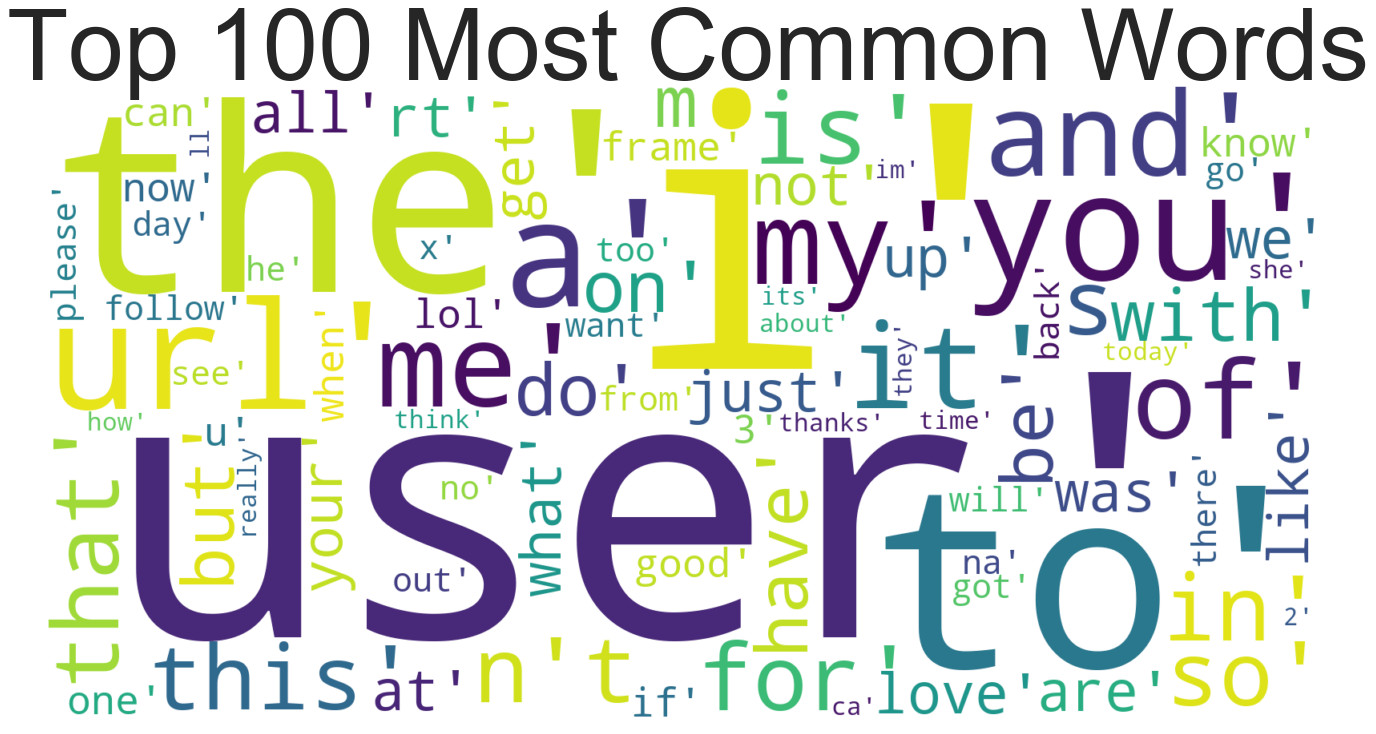

In [69]:
mostcommon = FreqDist(allwords).most_common(100)
print(mostcommon)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

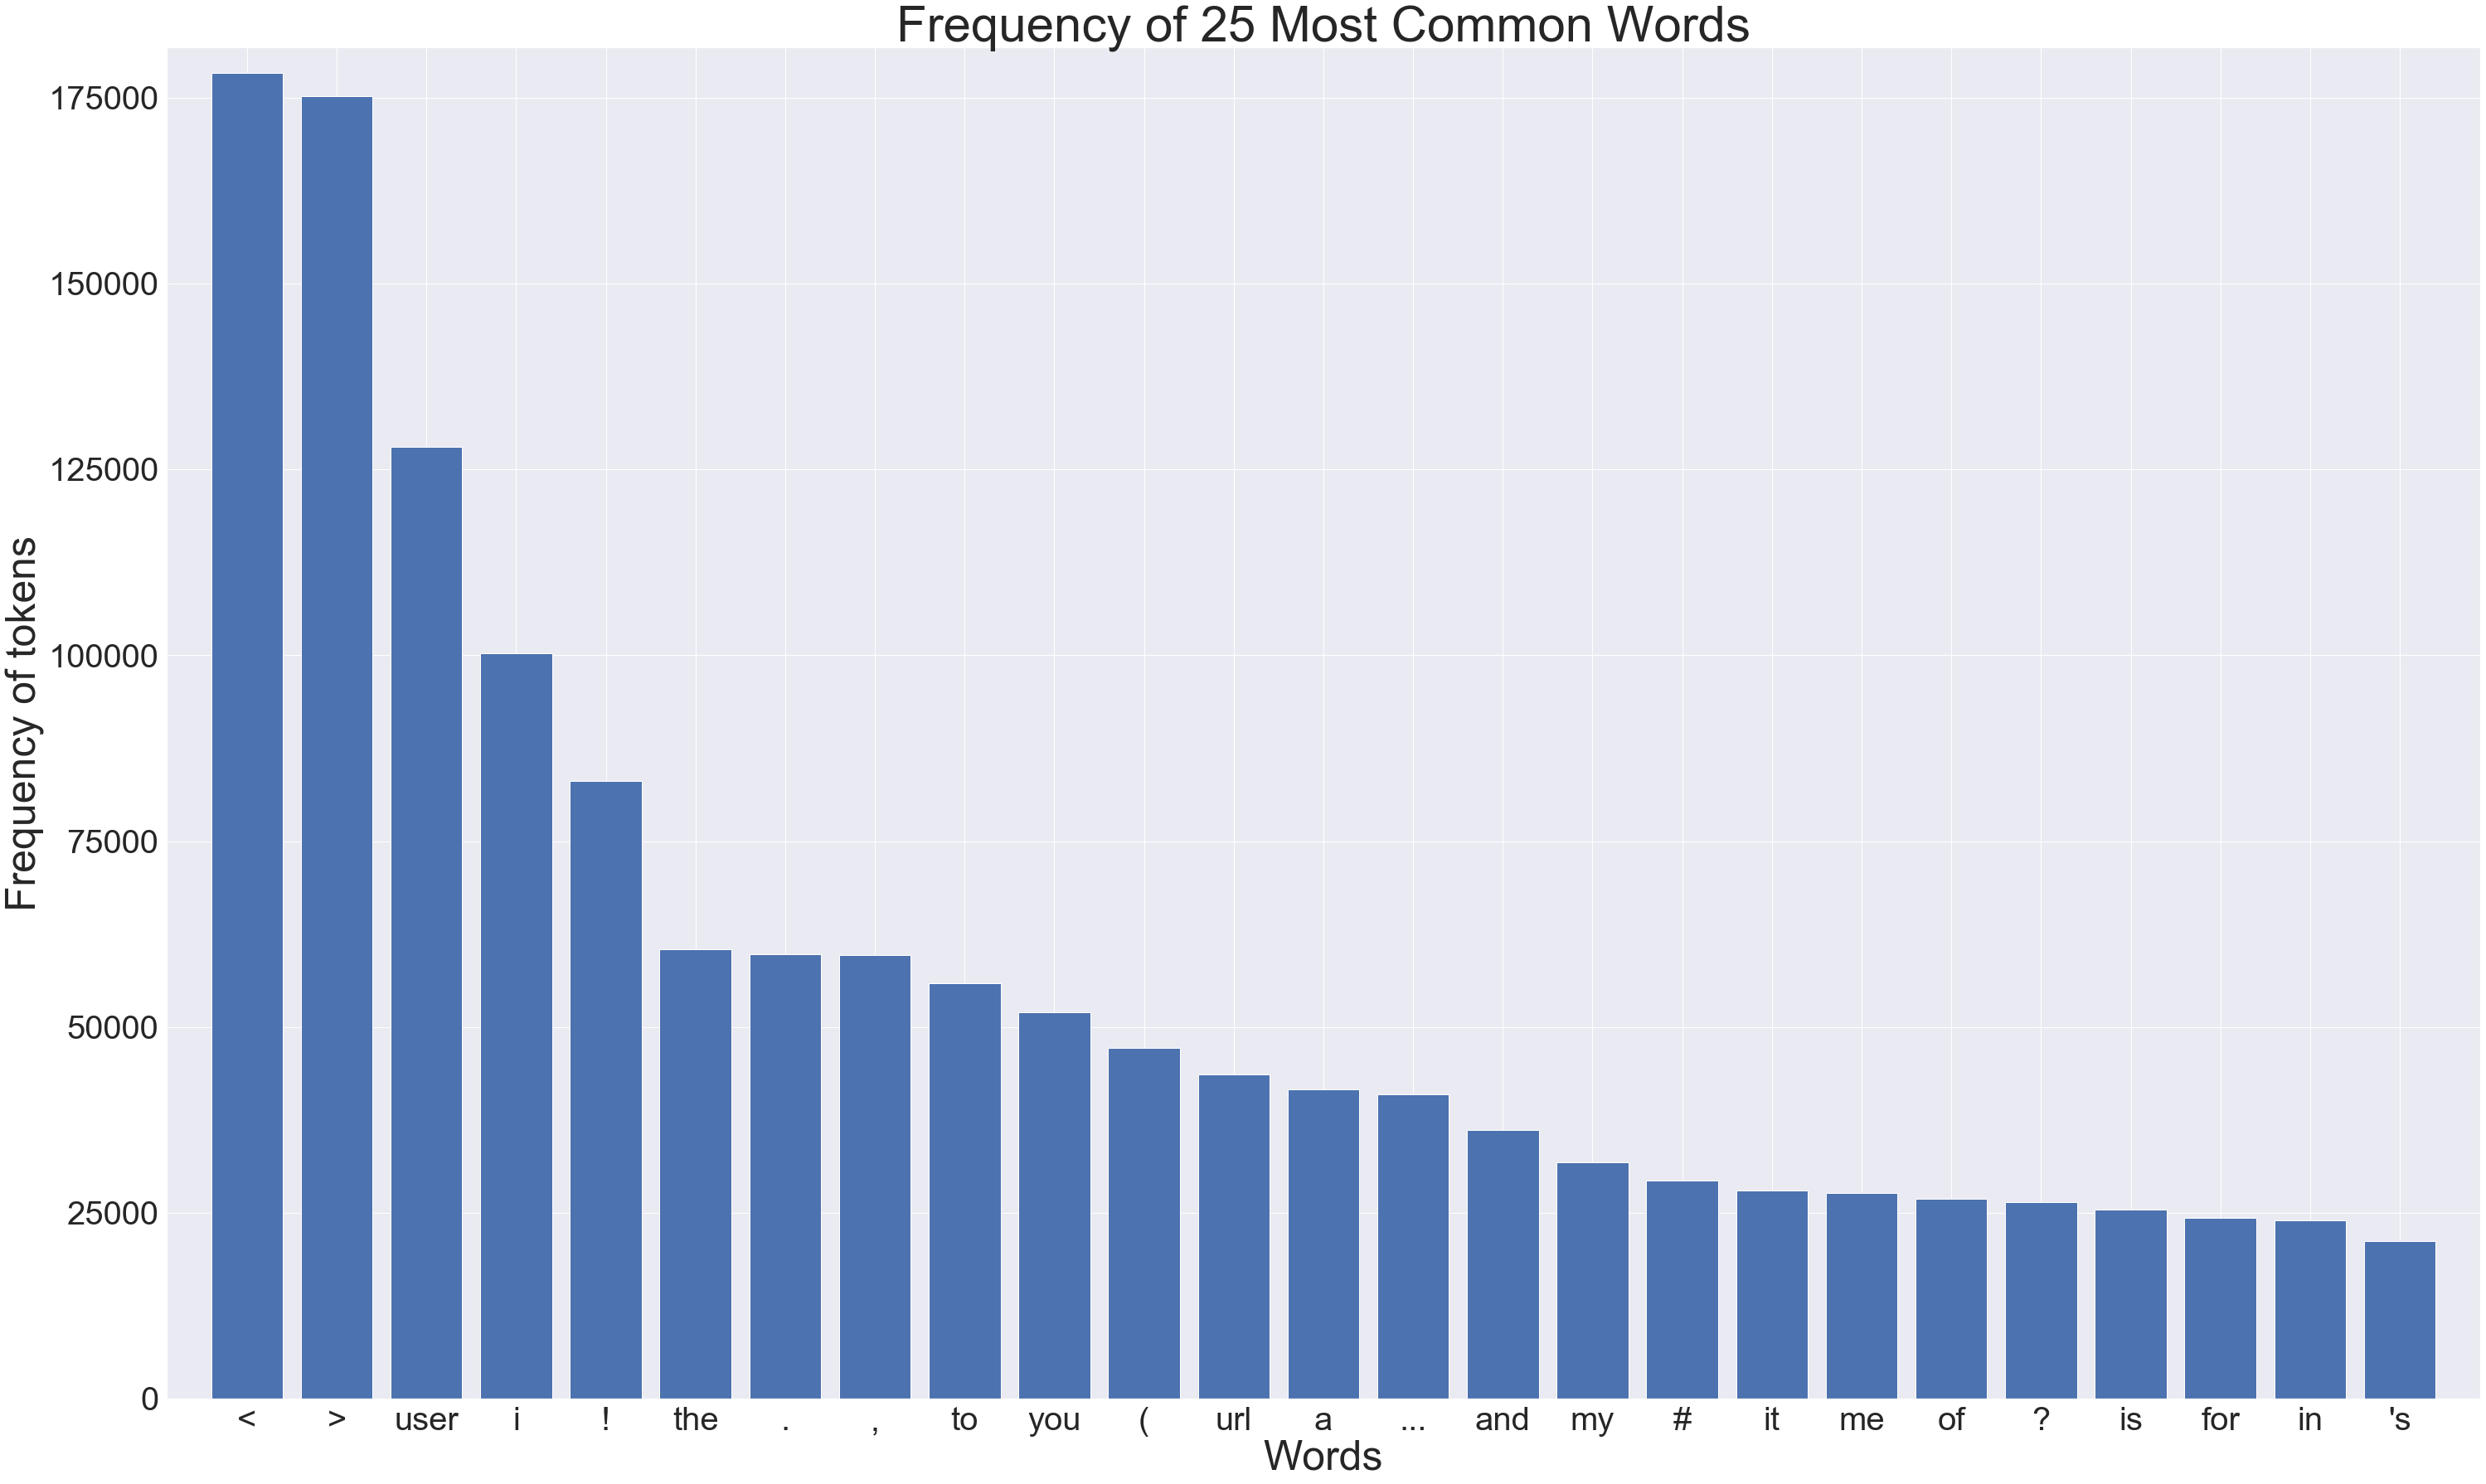

In [70]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of tokens', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=360, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [71]:
tweets['tweet_str'] = [''.join(map(str,l)) for l in tweets['body']]
tweets.head()

,body,label,words_count,tweet_len,tweet_str
0,not know justin read mention not only justin g...,1,15,92,not know justin read mention not only justin g...
1,logic dumb not even crop name photo tsk,1,8,39,logic dumb not even crop name photo tsk
2,put casper box ! looved battle ! <hashtag> cra...,1,9,53,put casper box ! looved battle ! <hashtag> cra...
3,thanks sir not trip lil mama .. keep doin ya t...,1,12,52,thanks sir not trip lil mama .. keep doin ya t...
4,visit brother tmr bestest birthday gift eveerr...,1,10,62,visit brother tmr bestest birthday gift eveerr...


In [72]:
example2 = tweets['tweet_str']
tokenized_sents2 = [word_tokenize(i) for i in example2]
allwords2 = []
for wordlist2 in tokenized_sents2:
    allwords2 += wordlist2

[('>', 128594), ('<', 128349), ('!', 67663), ('number', 53599), ('not', 35700), ('hashtag', 29376), ('?', 24280), ('..', 19572), ('love', 16677), ('lolexpr', 16447), ('get', 15924), ('go', 13751), ('can', 13642), ('emphasize', 12940), ('like', 9744), ('follow', 9436), ('rt', 9039), ('know', 8818), ('up', 8143), ('frame', 8007), ('good', 7872), ('one', 7830), ('day', 7635), ('see', 7597), ('want', 7326), ('make', 7146), ('no', 7133), ('think', 6366), ('please', 6279), ('ti', 6256), ('ame', 5974), ('na', 5968), ('back', 5756), ('miss', 5581), ('come', 5458), ('today', 5423), ('would', 5359), ('really', 5265), ('kisses', 5234), ('thanks', 5088), ('well', 5016), ('say', 4951), ('need', 4776), ('hi', 4138), ('work', 4105), ('look', 3971), ('feel', 3888), ('new', 3756), ('much', 3734), ('take', 3677), ('wish', 3665), ('tweet', 3644), ('paperback', 3520), ('thank', 3488), ('oh', 3384), ('only', 3356), ('girl', 3339), ('still', 3211), ('tomorrow', 3176), ('happy', 3149), ('friend', 3147), ('co

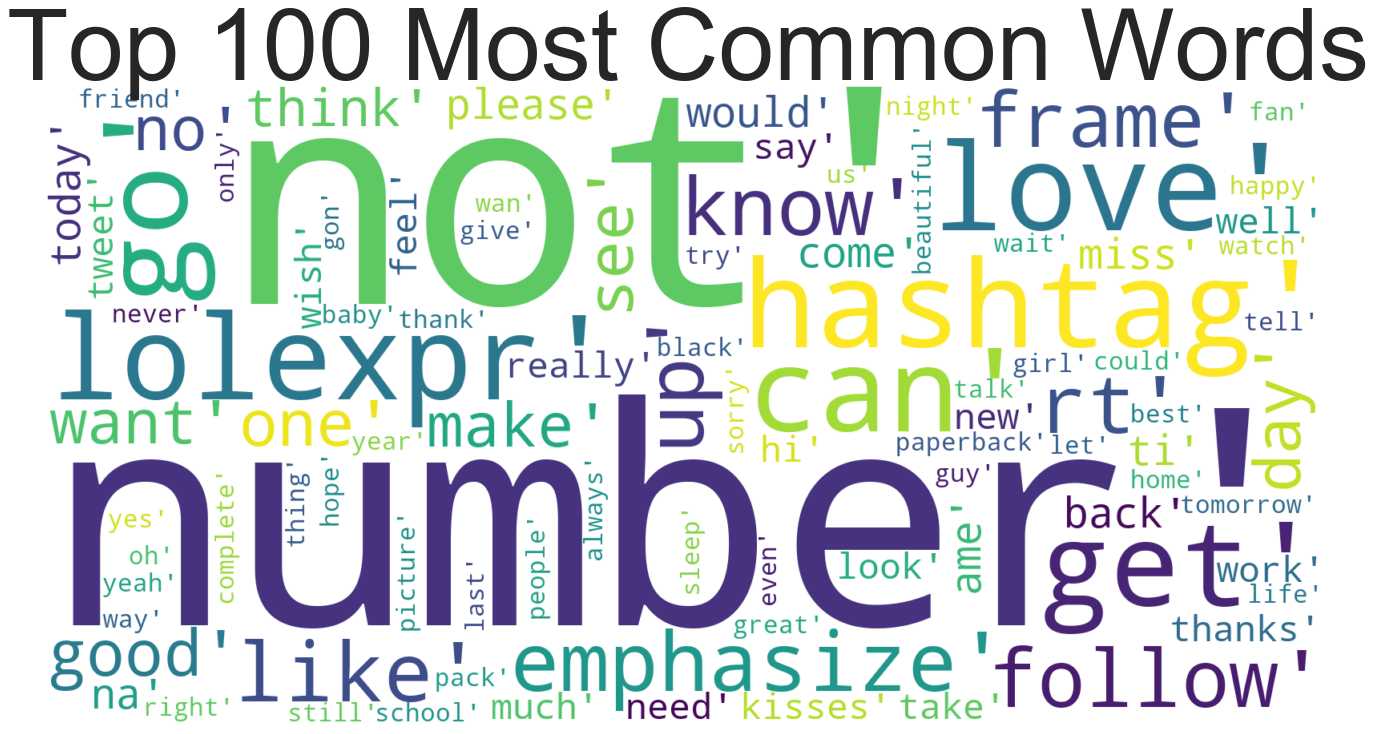

In [73]:
mostcommon2 = FreqDist(allwords2).most_common(100)
print(mostcommon2)
wordcloud2 = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon2))
fig2 = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

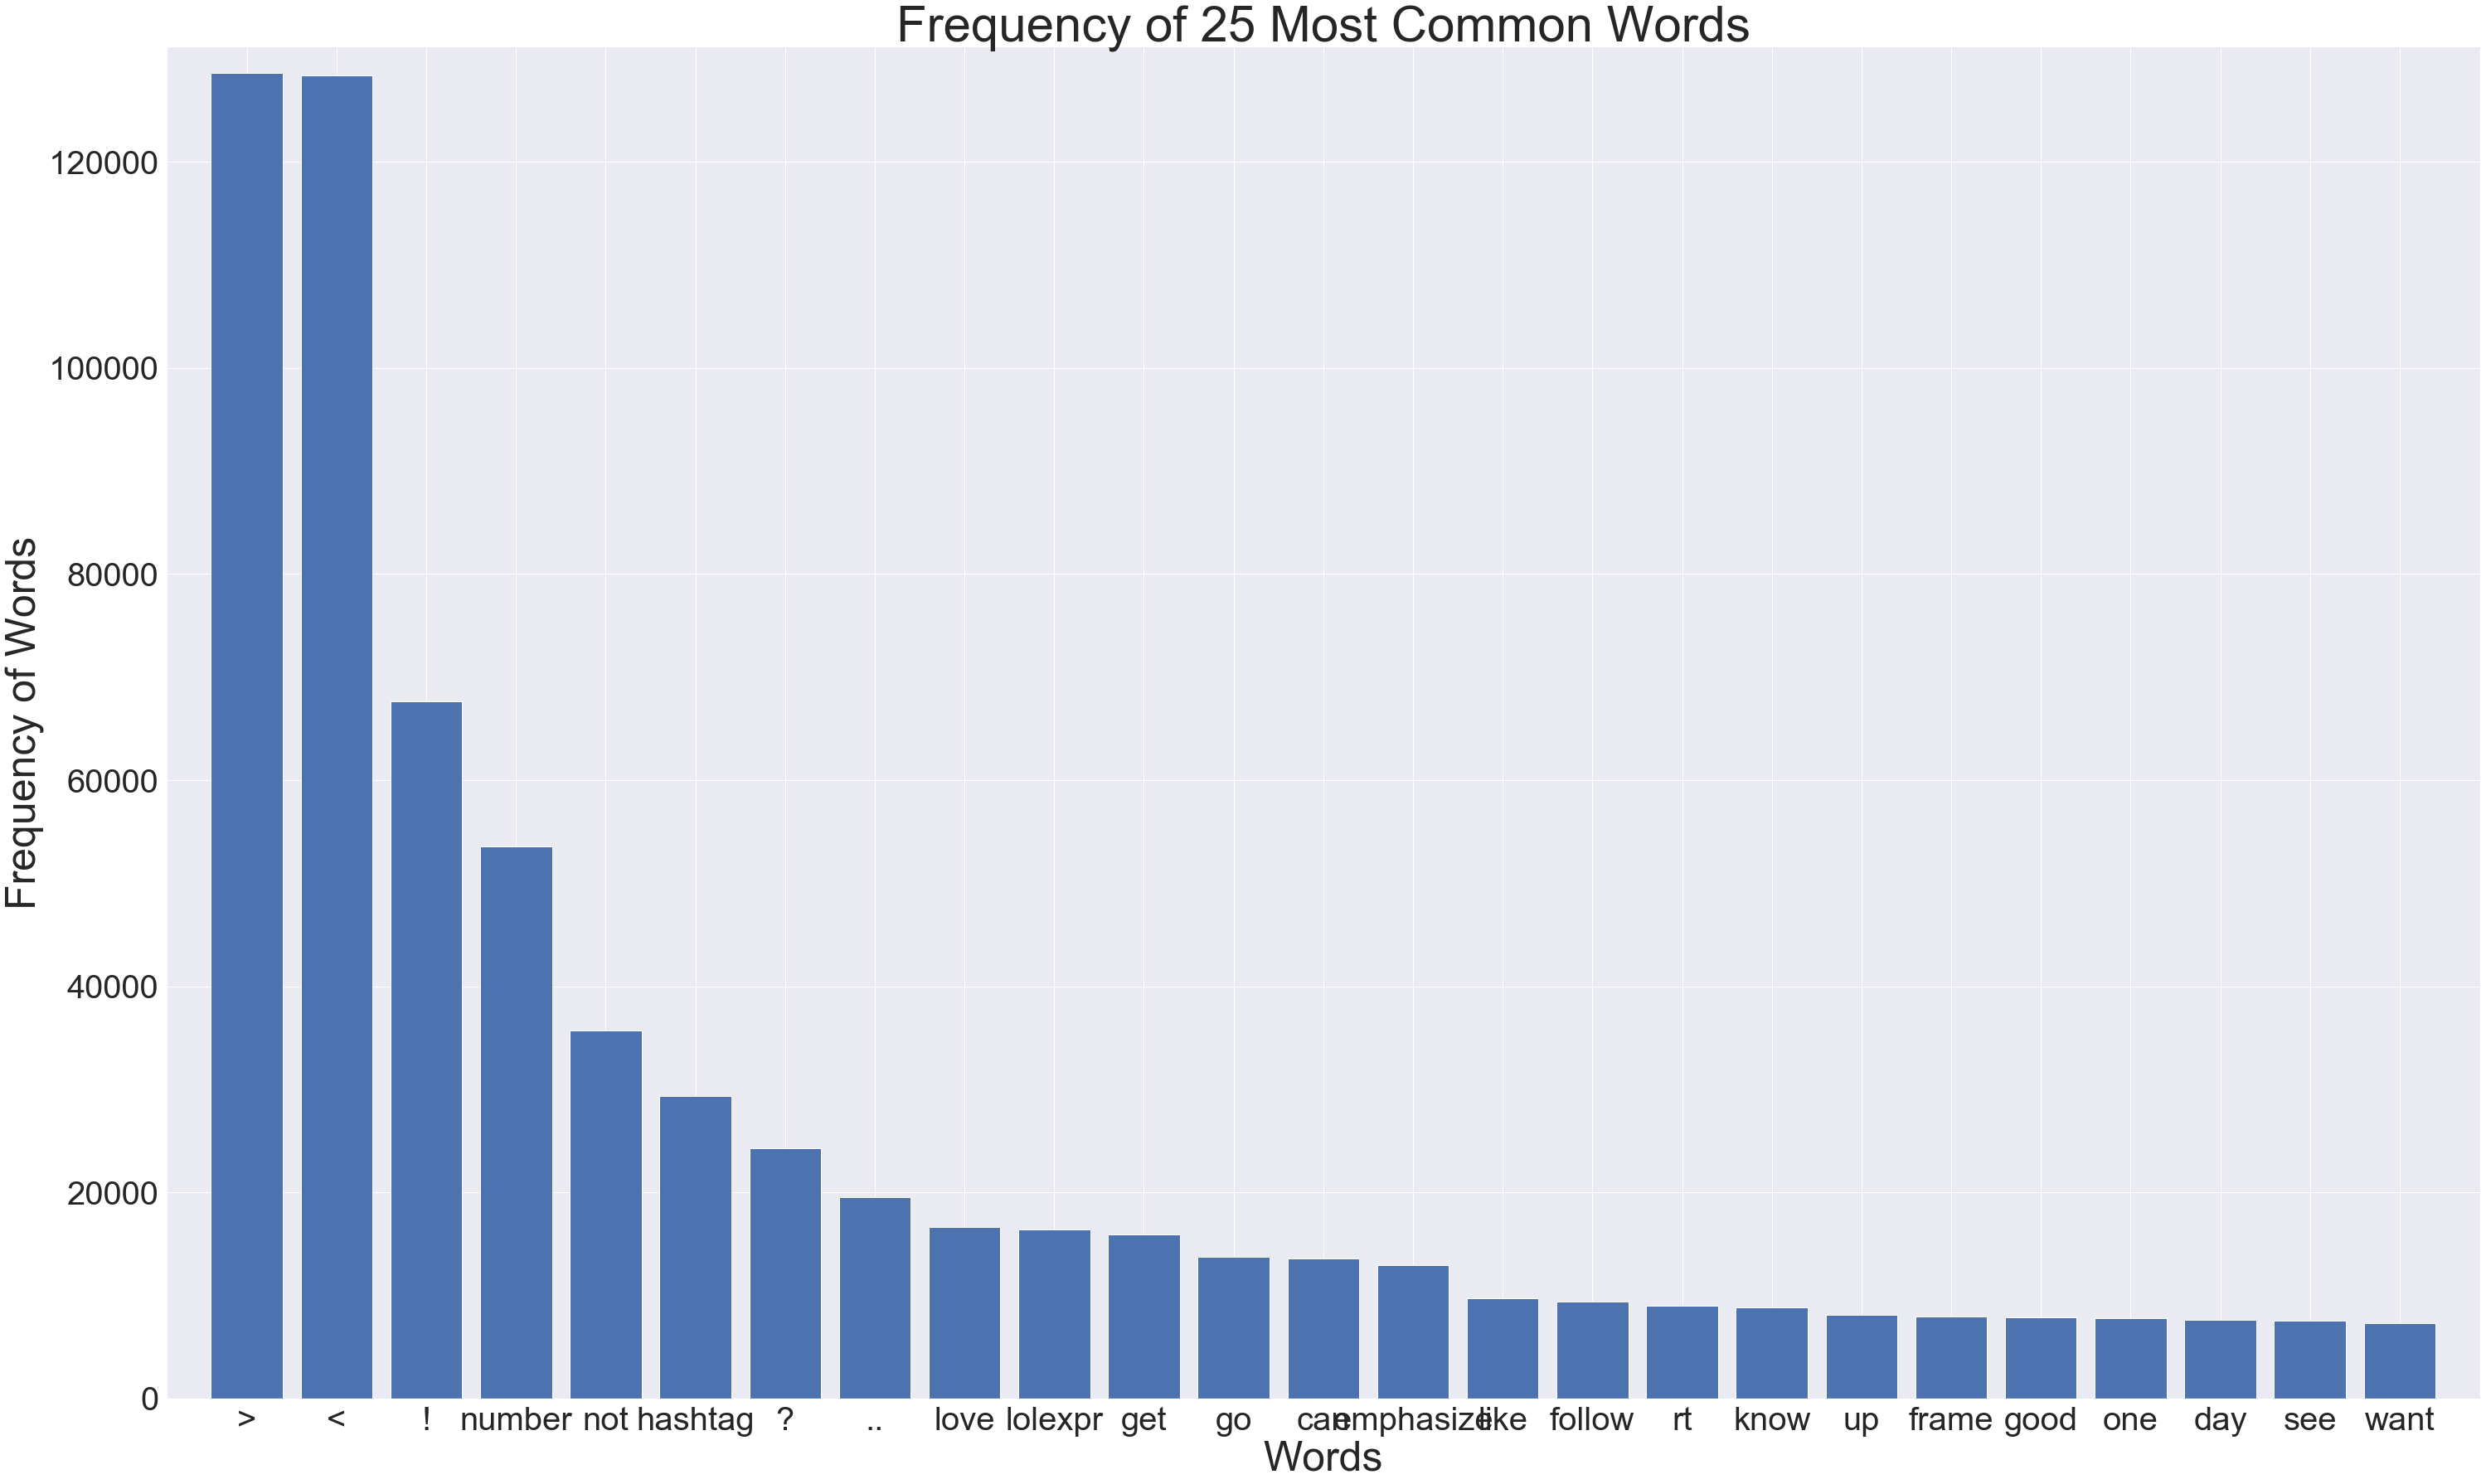

In [74]:
mostcommon_small2 = FreqDist(allwords2).most_common(25)
x, y = zip(*mostcommon_small2)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=360, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()